In [1]:
import os
import json
import pandas as pd
import numpy as np

In [3]:
def load_properties(file_path):
    with open(file_path, 'r') as file:
        properties = json.load(file)
    return properties

# Path to the properties.json file
properties_path = "./data_symbolic_regression/test/properties.json"
properties = load_properties(properties_path)

print("Properties Metadata:", properties)

Properties Metadata: {'n_var': 3, 'depth': 4, 'n_functions': 161, 'sample_per_formula': 1, 'n_point_range': [100, 101], 'const_range': [0.001, 2.0], 'var_bound_dict': {'var_0': [-5.0, 5.0], 'var_1': [-5.0, 5.0], 'var_2': [-5.0, 5.0]}, 'var_noise_sigma_list': [0.02, 0.02, 0.02], 'target_noise_sigma': 0.05, 'operators': ['sin', 'cos', 'tan', 'exp', 'log', 'sqrt', 'pow_2', 'gaussian', 'cosh', 'sinh', 'tanh', 'neg', 'reverse', 'add', 'mult'], 'directory': '/mnt/storage/home/aravanba/projects/GuidedSymbolicGPT/data/local/small_dataset/test'}


In [4]:
def parse_json_file(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return {
        "formula": data["formula"],
        "formula_human_readable": data["formula_human_readable"],
        "formula_depth": data["formula_depth"],
        "n_vars": data["n_vars"],
        "n_consts": data["n_consts"],
        "n_points": data["n_points"],
        "var_bound_dict": data["var_bound_dict"],
        "const_value_dict": data["const_value_dict"],
        "meta_list": data["meta_list"],
        "points": data["points"]  # This contains var_X and target values
    }

In [5]:
def load_test_data(test_folder_path):
    data_list = []
    for file_name in os.listdir(test_folder_path):
        if file_name.startswith("f_") and file_name.endswith(".json"):
            file_path = os.path.join(test_folder_path, file_name)
            parsed_data = parse_json_file(file_path)
            data_list.append(parsed_data)
    return data_list

# Path to the test folder
test_folder_path = "./data_symbolic_regression/test/"
test_data = load_test_data(test_folder_path)
print(f"Loaded {len(test_data)} functions from the test folder.")

Loaded 161 functions from the test folder.


In [6]:
def create_dataframe(data_list):
    rows = []
    for data in data_list:
        for idx in range(data["n_points"]):
            row = {
                "formula": data["formula"],
                "formula_human_readable": data["formula_human_readable"],
                "formula_depth": data["formula_depth"],
                "n_vars": data["n_vars"],
                "n_consts": data["n_consts"],
                "var_0": data["points"]["var_0"][idx],
                "var_1": data["points"]["var_1"][idx],
                "var_2": data["points"]["var_2"][idx],
                "target": data["points"]["target"][idx]
            }
            rows.append(row)
    return pd.DataFrame(rows)

df = create_dataframe(test_data)
print(df.head())

                                             formula  \
0  add(add(C_0(N, N), cosh(var_0, N)), add(sin(va...   
1  add(add(C_0(N, N), cosh(var_0, N)), add(sin(va...   
2  add(add(C_0(N, N), cosh(var_0, N)), add(sin(va...   
3  add(add(C_0(N, N), cosh(var_0, N)), add(sin(va...   
4  add(add(C_0(N, N), cosh(var_0, N)), add(sin(va...   

                         formula_human_readable  formula_depth  n_vars  \
0  ((C_0+cosh(var_0))+(sin(var_2)+sqrt(var_1)))              4       3   
1  ((C_0+cosh(var_0))+(sin(var_2)+sqrt(var_1)))              4       3   
2  ((C_0+cosh(var_0))+(sin(var_2)+sqrt(var_1)))              4       3   
3  ((C_0+cosh(var_0))+(sin(var_2)+sqrt(var_1)))              4       3   
4  ((C_0+cosh(var_0))+(sin(var_2)+sqrt(var_1)))              4       3   

   n_consts    var_0    var_1    var_2    target  
0         1 -3.02015 -1.36467  1.83509  13.49721  
1         1 -4.84750 -2.52293 -2.34561  72.39980  
2         1  2.19690 -0.90045  3.16025   5.30534  
3         1 -0

In [9]:
output_path = "./data_symbolic_regression/preprocessed_test_data.csv"
df.to_csv(output_path, index=False)
print(f"Data saved to {output_path}")

Data saved to ./data_symbolic_regression/preprocessed_test_data.csv


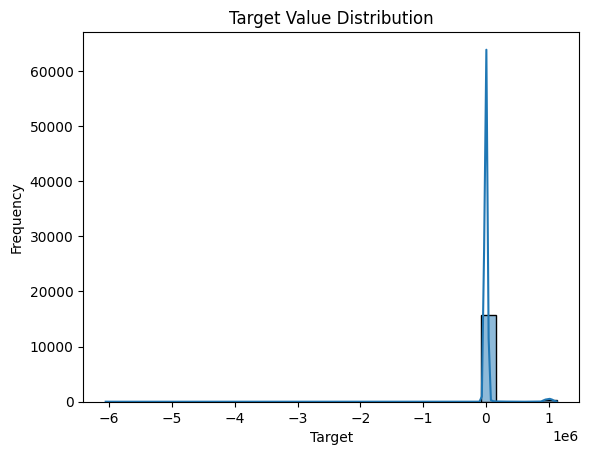

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Distribution of target values
sns.histplot(df["target"], bins=30, kde=True)
plt.title("Target Value Distribution")
plt.xlabel("Target")
plt.ylabel("Frequency")
plt.show()